In [1]:
import numpy as np # algebra linear
import pandas as pd # processamento de dados, arquivos CSV I/O.
import datetime as dt

# Para gráficos 
from matplotlib import pyplot as plt
import seaborn as sns

# Biblioteca para ML
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv(r"C:\Users\rfsantos\OneDrive - Mongeral Aegon\Treinamentos\BI Master\DM\Trabalho DM\horse.csv", keep_default_na = True).drop(['cp_data', 'hospital_number', 'lesion_2', 'lesion_3', 'nasogastric_reflux_ph'], axis = 1)
test = pd.read_csv(r"C:\Users\rfsantos\OneDrive - Mongeral Aegon\Treinamentos\BI Master\DM\Trabalho DM\horseTest.csv", keep_default_na = True).drop(['cp_data', 'hospital_number', 'lesion_2', 'lesion_3', 'nasogastric_reflux_ph'], axis = 1) 

In [3]:
# Verificando as dimensões dos datasets
print("--- Dataset Treino ---")
print("Variáveis:\t{}\nEntradas:\t{}\n".format(train.shape[1], train.shape[0]))

print("--- Dataset Teste ---")
print("Variáveis:\t{}\nEntradas:\t{}".format(test.shape[1], test.shape[0]))

--- Dataset Treino ---
Variáveis:	23
Entradas:	299

--- Dataset Teste ---
Variáveis:	23
Entradas:	89


In [4]:
# Identificando os tipos de dados e os exemplos de registro do dataset
display(train.dtypes)
display(train.dtypes.value_counts())
train.head()

surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
dtype: object

object     16
float64     6
int64       1
dtype: int64

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,less_1_liter,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300


In [5]:
#Visão geral das variáveis numéricas
train.describe()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,lesion_1
count,239.000000,275.000000,241.000000,270.000000,266.000000,101.000000,299.000000
mean,38.168619,72.000000,30.460581,46.307407,24.274436,3.039604,3659.709030
std,0.733744,28.646219,17.666102,10.436743,27.364194,1.967947,5408.472421
min,35.400000,30.000000,8.000000,23.000000,3.300000,0.100000,0.000000
25%,37.800000,48.000000,18.000000,38.000000,6.500000,2.000000,2111.500000
50%,38.200000,64.000000,25.000000,45.000000,7.500000,2.300000,2322.000000
75%,38.500000,88.000000,36.000000,52.000000,56.750000,3.900000,3209.000000
max,40.800000,184.000000,96.000000,75.000000,89.000000,10.100000,41110.000000


surgery                    0
age                        0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
dtype: int64


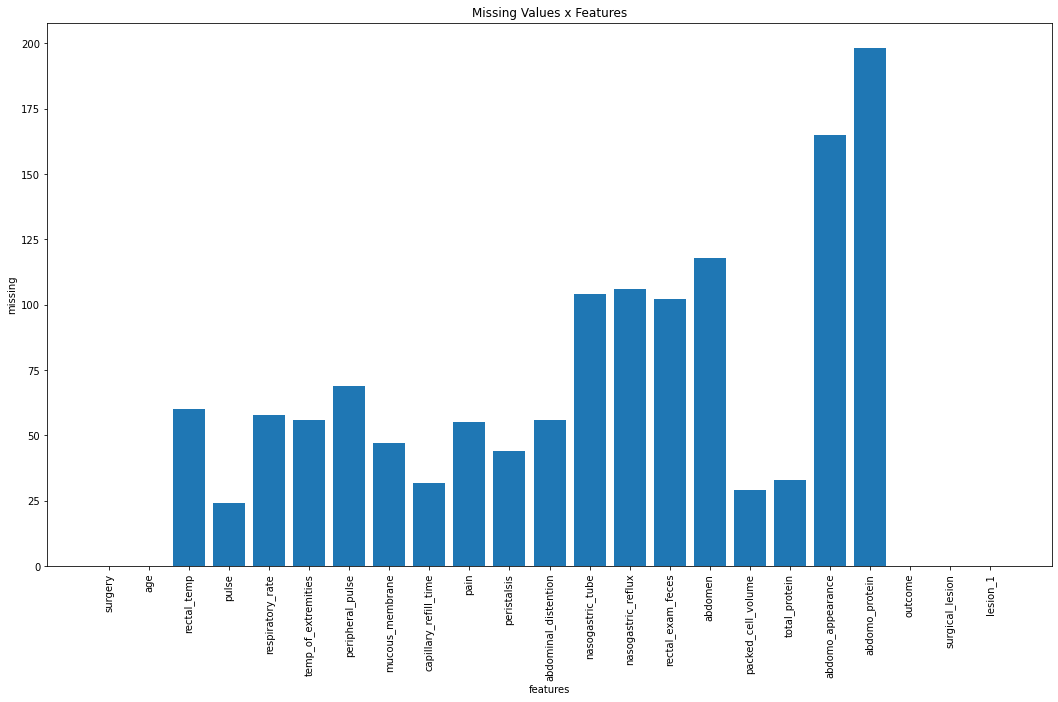

In [6]:
# Checando e comparando os missing values das features de treino
qtde_nulos = train.isna().sum()

print(qtde_nulos)

plt.figure(figsize=(18,10))
plt.bar(range(len(qtde_nulos)), qtde_nulos)
plt.title('Missing Values x Features')
plt.xlabel('features')
plt.ylabel('missing')
plt.xticks(list(range(len(train.columns))), list(train.columns.values), rotation='vertical')
plt.show()

C:\Users\rfsantos\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rfsantos\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rfsantos\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\rfsantos\Anaconda3\lib\site-packages\pandas\plo

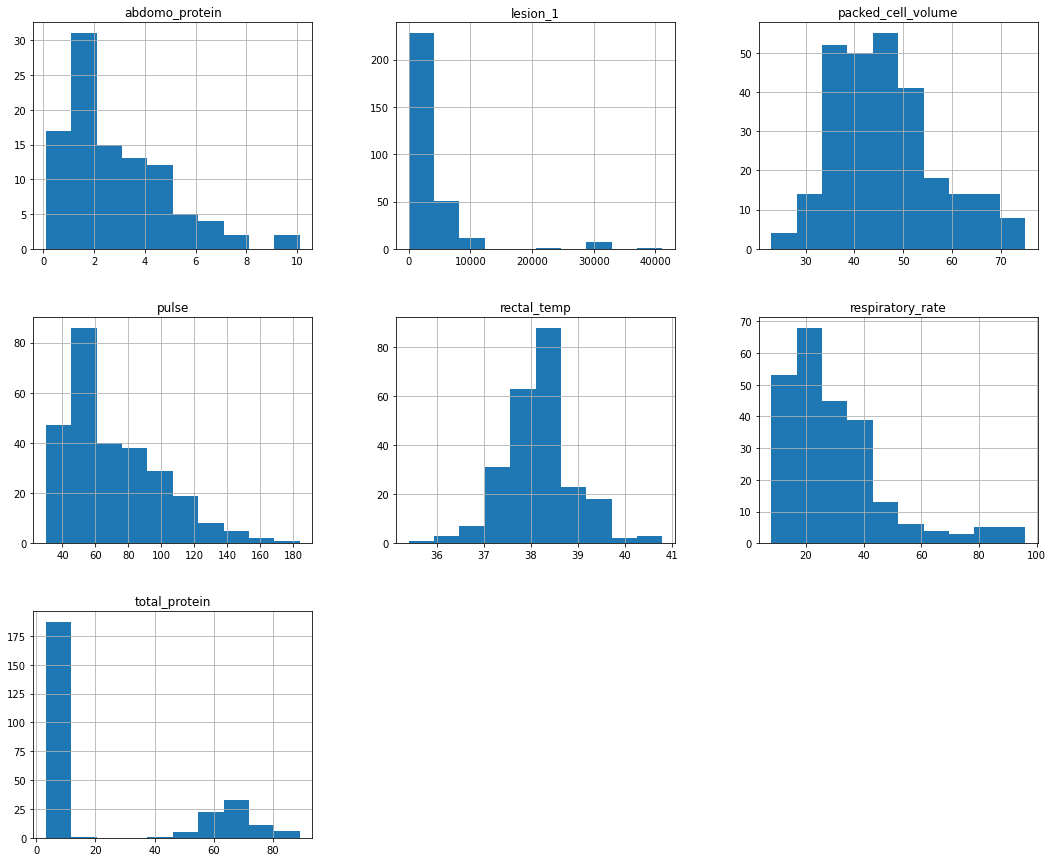

In [7]:
# Ver histograma das variáveis numéricas
train.hist(figsize=(18,15));

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64


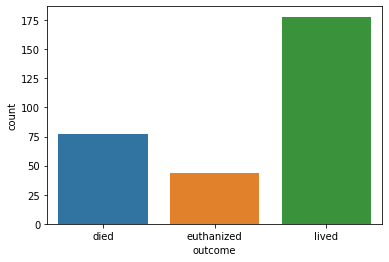

In [8]:
# Ver os rótulos do dataset e respectivas quantidades
sns.countplot(data=train, x='outcome');
print(train.outcome.value_counts())

In [9]:
np.random.seed(0)

In [10]:
train.columns

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1'],
      dtype='object')

In [11]:
# Concatenar train e test
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

df_merged = df_merged[['outcome','surgery','age','rectal_temp','pulse','respiratory_rate','temp_of_extremities',\
 'peripheral_pulse','mucous_membrane','capillary_refill_time','pain','peristalsis','abdominal_distention','nasogastric_tube',\
 'nasogastric_reflux','rectal_exam_feces','abdomen','packed_cell_volume','total_protein','abdomo_appearance','abdomo_protein',\
 'surgical_lesion','lesion_1']]

In [12]:
# Substituir na coluna lesion_1 valor 0 por NaN
df_merged['lesion_1'] = df_merged['lesion_1'].replace(0, np.nan)
df_merged.head(10)

,outcome,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1
0,died,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,no,11300.0
1,euthanized,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,no,2208.0
2,lived,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,no,NaN
3,died,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,none,less_1_liter,decreased,NaN,48.0,7.2,serosanguious,5.3,yes,2208.0
4,died,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,no,4300.0
5,lived,no,adult,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,...,slight,none,decreased,firm,NaN,NaN,NaN,NaN,no,NaN
6,lived,yes,adult,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,none,none,decreased,distend_large,37.0,7.0,NaN,NaN,yes,3124.0
7,died,yes,adult,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,...,slight,none,decreased,distend_small,44.0,8.3,NaN,NaN,yes,2208.0
8,euthanized,no,adult,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,slight,none,decreased,distend_large,38.0,6.2,NaN,NaN,yes,3205.0
9,lived,no,young,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,...,slight,none,decreased,NaN,40.0,6.2,clear,2.2,no,NaN


In [13]:
# Transformar a coluna lesion_1 para tipo object
df_merged['lesion_1'] = df_merged['lesion_1'].astype(object)

In [14]:
# Substituir NaN nas colunas tipo object com a moda e colunas tipo diferente de object com a mediana
imp_mode = SimpleImputer(strategy = 'most_frequent')
imp_median = SimpleImputer(strategy = 'median')
for colname in df_merged.columns:
    if df_merged[colname].dtype == object:
        df_merged[colname] = pd.DataFrame(imp_mode.fit_transform(df_merged[colname].values.reshape(-1,1)))
    else: 
        df_merged[colname] = pd.DataFrame(imp_median.fit_transform(df_merged[colname].values.reshape(-1,1)))
        


In [15]:
# Aplicar Label Encoder para o atributo "outcome"
df_merged['outcome'] = df_merged['outcome'].astype('category').cat.codes
df_merged.head()

,outcome,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1
0,0,no,adult,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,slight,none,decreased,distend_large,45.0,8.4,cloudy,2.0,no,11300
1,1,yes,adult,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,slight,none,absent,other,50.0,85.0,cloudy,2.0,no,2208
2,2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,slight,none,normal,normal,33.0,6.7,cloudy,2.0,no,3111
3,0,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,none,less_1_liter,decreased,distend_large,48.0,7.2,serosanguious,5.3,yes,2208
4,0,no,adult,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,slight,none,absent,distend_large,74.0,7.4,cloudy,2.0,no,4300


In [16]:
# Utilizar OneHotEncoder para transformar dados categóricos em numéricos
X = df_merged[df_merged.columns[1:23]]

encoder = OneHotEncoder(drop = 'first', dtype = np.float64, handle_unknown = 'error')
X_object = X.select_dtypes('object')
encoder.fit(X_object)
codes = encoder.transform(X_object).toarray()
feature_names = encoder.get_feature_names(['surgery','age','temp_of_extremities','peripheral_pulse','mucous_membrane','capillary_refill_time','pain','peristalsis','abdominal_distention','nasogastric_tube','nasogastric_reflux','rectal_exam_feces','abdomen','abdomo_appearance','surgical_lesion','lesion_1'])

df_codes = pd.DataFrame(codes,columns=feature_names).astype(int)
df_float = pd.DataFrame(df_merged.select_dtypes(exclude='object'))
                     
X = pd.concat([df_float.reset_index(), df_codes.reset_index()], axis = 1, sort=False)

In [17]:
# Normalizar os dados
min_max_scaler = MinMaxScaler()
scaler = min_max_scaler.fit_transform(X)
df_normalized = pd.DataFrame(scaler)
df_normalized.head(10)

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,0.000000,0.0,0.574074,0.233766,0.227273,0.423077,0.059510,0.19,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.002584,0.5,0.703704,0.376623,0.136364,0.519231,0.953326,0.19,0.002584,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005168,1.0,0.537037,0.064935,0.181818,0.192308,0.039673,0.19,0.005168,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.007752,0.0,0.685185,0.870130,0.863636,0.480769,0.045508,0.52,0.007752,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.010336,0.0,0.351852,0.480519,0.306818,0.980769,0.047841,0.19,0.010336,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.012920,1.0,0.518519,0.220779,0.227273,0.423077,0.049008,0.19,0.012920,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.015504,1.0,0.462963,0.116883,0.090909,0.269231,0.043174,0.19,0.015504,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.018088,0.0,0.518519,0.194805,0.227273,0.403846,0.058343,0.19,0.018088,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.020672,0.5,0.518519,0.324675,0.318182,0.288462,0.033839,0.19,0.020672,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.023256,1.0,0.537037,0.389610,0.227273,0.326923,0.033839,0.21,0.023256,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Concatenar coluna outcome ao dataframe normalizado
df_normalized = pd.concat([df_merged['outcome'].reset_index(drop=True),df_normalized.reset_index(drop=True)], axis = 1, sort=False)
df_normalized.head(10)

,outcome,0,1,2,3,4,5,6,7,8,...,97,98,99,100,101,102,103,104,105,106
0,0,0.000000,0.0,0.574074,0.233766,0.227273,0.423077,0.059510,0.19,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.002584,0.5,0.703704,0.376623,0.136364,0.519231,0.953326,0.19,0.002584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.005168,1.0,0.537037,0.064935,0.181818,0.192308,0.039673,0.19,0.005168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.007752,0.0,0.685185,0.870130,0.863636,0.480769,0.045508,0.52,0.007752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.010336,0.0,0.351852,0.480519,0.306818,0.980769,0.047841,0.19,0.010336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,0.012920,1.0,0.518519,0.220779,0.227273,0.423077,0.049008,0.19,0.012920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,0.015504,1.0,0.462963,0.116883,0.090909,0.269231,0.043174,0.19,0.015504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0.018088,0.0,0.518519,0.194805,0.227273,0.403846,0.058343,0.19,0.018088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0.020672,0.5,0.518519,0.324675,0.318182,0.288462,0.033839,0.19,0.020672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2,0.023256,1.0,0.537037,0.389610,0.227273,0.326923,0.033839,0.21,0.023256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
train = df_normalized.iloc[:299]
test = df_normalized.iloc[299:]

X_train = train.drop('outcome', axis=1).values
Y_train = train['outcome']
X_test  = test.drop('outcome', axis=1).values
Y_test  = test['outcome']

In [20]:
# Random Forest
begin_time = dt.datetime.now()

seed = 1000
random_forest = RandomForestClassifier(n_estimators=150, min_samples_leaf=3, max_features=0.5, n_jobs=-1, random_state = seed)
random_forest.fit(X_train, Y_train)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print('Acurácia do modelo RandomForestClassifier:',acc_random_forest,"\n")

Y_pred1 = random_forest.predict(X_test)

# Matrix de Confusão
print(pd.crosstab(Y_test,Y_pred1,
                  rownames=["Real"], 
                  colnames=["Predict"], 
                  margins=True))

time_rf = (dt.datetime.now() - begin_time)

Acurácia do modelo RandomForestClassifier: 100.0 

Predict   0   1   2  All
Real                    
0        23   0   0   23
1         0  13   0   13
2         0   0  53   53
All      23  13  53   89


In [21]:
# Decision Tree
begin_time = dt.datetime.now()

seed = 1000
decision_tree = DecisionTreeClassifier(max_depth = 3, random_state = seed)
decision_tree.fit(X_train, Y_train)

Y_pred2 = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print('Acurácia do modelo DecisionTreeClassifier:',acc_decision_tree, "\n")

# Matrix de Confusão
print(pd.crosstab(Y_test,Y_pred2,
                  rownames=["Real"], 
                  colnames=["Predict"], 
                  margins=True))

time_d3 = (dt.datetime.now() - begin_time)

Acurácia do modelo DecisionTreeClassifier: 100.0 

Predict   0   1   2  All
Real                    
0        23   0   0   23
1         0  13   0   13
2         0   0  53   53
All      23  13  53   89


In [22]:
# KNN
begin_time = dt.datetime.now()

knn = KNeighborsClassifier(n_neighbors = 2, weights= 'distance')
knn.fit(X_train, Y_train)

Y_pred3 = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print('Acurácia do modelo KNeighborsClassifier:',acc_knn, "\n")

# Matrix de Confusão
print(pd.crosstab(Y_test,Y_pred3,
                  rownames=["Real"], 
                  colnames=["Predict"], 
                  margins=True))

time_knn = (dt.datetime.now() - begin_time)

Acurácia do modelo KNeighborsClassifier: 100.0 

Predict   0   1   2  All
Real                    
0        23   0   0   23
1         0  13   0   13
2         0   0  53   53
All      23  13  53   89


In [23]:
# Logistic Regression
begin_time = dt.datetime.now()

seed = 1000
logreg = LogisticRegression(random_state = seed)
logreg.fit(X_train, Y_train)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('Acurácia do modelo LogisticRegression:',acc_log, "\n")

Y_pred4 = logreg.predict(X_test)

# Matrix de Confusão
print(pd.crosstab(Y_test,Y_pred4,
                  rownames=["Real"], 
                  colnames=["Predict"], 
                  margins=True))

time_lg = (dt.datetime.now() - begin_time)

Acurácia do modelo LogisticRegression: 99.67 

Predict   0   1   2  All
Real                    
0        23   0   0   23
1         0  13   0   13
2         0   0  53   53
All      23  13  53   89


In [24]:
# Ranking final do percentual de acurácia dos modelos aplicados
results = pd.DataFrame({
    'Model': ['Random Forest','KNN','Decision Tree','Logistic Regression'],
    'Score': [acc_random_forest, acc_knn, acc_decision_tree, acc_log ],
    'Time': [time_rf, time_d3, time_knn, time_knn]})
    
result_df = results.sort_values(by='Time', ascending=True)
result_df = result_df.set_index('Time')
result_df.head(9)

,Model,Score
Time,,
00:00:00.039863,KNN,100.00
00:00:00.058879,Decision Tree,100.00
00:00:00.058879,Logistic Regression,99.67
00:00:00.625682,Random Forest,100.00
